Time Series Analysis

In [80]:
#Importing the required libraries
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [81]:
plt.rcParams.update({'figure.figsize': (9, 6), 'figure.dpi': 120, 'figure.autolayout': True})
plt.style.use("bmh")


This is a line of code using the matplotlib library in Python to update the default settings for creating plots. Specifically, it updates two parameters using the `plt.rcParams.update()` method:

- figure.figsize : This parameter sets the default size of the figure (plot) in inches. In this case, it sets the default size to be 10 inches wide and 7 inches tall.

- figure.dpi : This parameter sets the default resolution (dots per inch) for the figure. In this case, it sets the default resolution to be 120 DPI.

- figure.autolayout :Set to True, which automatically adjusts the margins and spacing of the plot to fit the content of the figure.

By updating these parameters, this line of code allows for consistent figure sizing and resolution across multiple plots in a script or notebook. This can be useful for creating clean, professional-looking visualizations.

In [82]:
# importing the data
df = pd.read_csv('a10.csv', parse_dates=['date'])

df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [83]:
df.dtypes

date     datetime64[ns]
value           float64
dtype: object

The 'parse_dates' parameter is used to specify which columns in the CSV file should be parsed as dates. In this case, the 'date' column is specified, so the values in that column will be converted to a datetime format when the file is read into memory.

In [84]:
df.shape

(204, 2)

In [85]:
df.info

<bound method DataFrame.info of           date      value
0   1991-07-01   3.526591
1   1991-08-01   3.180891
2   1991-09-01   3.252221
3   1991-10-01   3.611003
4   1991-11-01   3.565869
..         ...        ...
199 2008-02-01  21.654285
200 2008-03-01  18.264945
201 2008-04-01  23.107677
202 2008-05-01  22.912510
203 2008-06-01  19.431740

[204 rows x 2 columns]>

Panel Data VS Vector Autoregression

Panel data, also known as longitudinal data or cross-sectional time-series data, is a type of data that contains observations of multiple variables for the same individuals or entities over time. Panel data is commonly used in economics, finance, and social sciences for studying the relationships between variables and how they change over time.

In panel data, the same individuals or entities are observed at multiple points in time, allowing researchers to track changes in variables over time and study the relationships between variables at the individual or entity level. Panel data can be organized in a rectangular format, where each row corresponds to an individual or entity, and each column corresponds to a variable measured at a particular time point.

Panel data can be used to estimate both cross-sectional and time-series relationships. Panel data analysis methods take into account the dependence between observations for the same individual or entity, which can improve the accuracy of statistical inference compared to using independent cross-sectional or time-series data alone. Some common methods used for analyzing panel data include fixed effects models, random effects models, and pooled regression models.

Panel data and Vector Autoregression (VAR) are both used to analyze relationships between variables, but they are different in their data structure, assumptions, and applications.

Panel data consists of observations of multiple variables for the same individuals or entities over time, while VAR models are used to analyze the interdependence among multiple time series variables measured at the same time points. Panel data can be used to study how the values of a variable change over time for a particular individual or entity, and how those changes are related to other variables, while VAR models are used to study how changes in one variable are related to changes in other variables in a system over time.

In terms of assumptions, panel data models typically assume that the individual-specific effects are fixed or random, and that the error terms are independently and identically distributed. VAR models, on the other hand, assume that the time series variables are stationary, meaning that their means, variances, and autocovariances are constant over time.

In terms of applications, panel data models are commonly used in economics, finance, and social sciences to study individual or entity-level effects, while VAR models are commonly used in macroeconomics, finance, and engineering to model complex systems with multiple interdependent variables.

Here's an example that highlights the differences between panel data and VAR models:

Suppose we are interested in studying the relationship between GDP, investment, and government spending in a country over time. We have two datasets:

1. Panel data: We have annual data on GDP, investment, and government spending for multiple countries over a period of 10 years. Each row of the dataset represents a country, and each column represents a variable measured at a particular time point.

2. VAR data: We have monthly data on GDP, investment, and government spending for a single country over a period of 10 years. Each row of the dataset represents a month, and each column represents a variable measured at the same time point.

Using the panel data, we can estimate a panel data regression model to study how GDP, investment, and government spending are related at the country level over time. We can control for country-specific effects by including fixed or random effects in the model. For example, we might estimate a model like:

GDP_i,t = β_0 + β_1 Investment_i,t + β_2 GovtSpending_i,t + α_i + ε_i,t

where GDP_i,t is the GDP of country i at time t, Investment_i,t is the investment of country i at time t, GovtSpending_i,t is the government spending of country i at time t, α_i is the country-specific fixed effect, and ε_i,t is the error term.

Using the VAR data, we can estimate a VAR model to study the dynamic relationships among GDP, investment, and government spending over time. For example, we might estimate a model like:

ΔGDP_t = β_01 + β_11ΔGDP_(t-1) + β_12ΔInvestment_(t-1) + β_13ΔGovtSpending_(t-1) + ε_1,t
ΔInvestment_t = β_02 + β_21ΔGDP_(t-1) + β_22ΔInvestment_(t-1) + β_23ΔGovtSpending_(t-1) + ε_2,t
ΔGovtSpending_t = β_03 + β_31ΔGDP_(t-1) + β_32ΔInvestment_(t-1) + β_33ΔGovtSpending_(t-1) + ε_3,t

where ΔGDP_t, ΔInvestment_t, and ΔGovtSpending_t are the first differences of GDP, investment, and government spending at time t, β_11, β_12, β_13, β_21, β_22, β_23, β_31, β_32, and β_33 are the coefficients of the model, and ε_1,t, ε_2,t, and ε_3,t are the error terms.

In summary, panel data and VAR models are used for different types of data and research questions. Panel data models are used to study the relationships between variables at the individual or entity level over time, while VAR models are used to study the dynamic relationships among multiple time series variables measured at the same time points.

Text(0, 0.5, 'Sales')

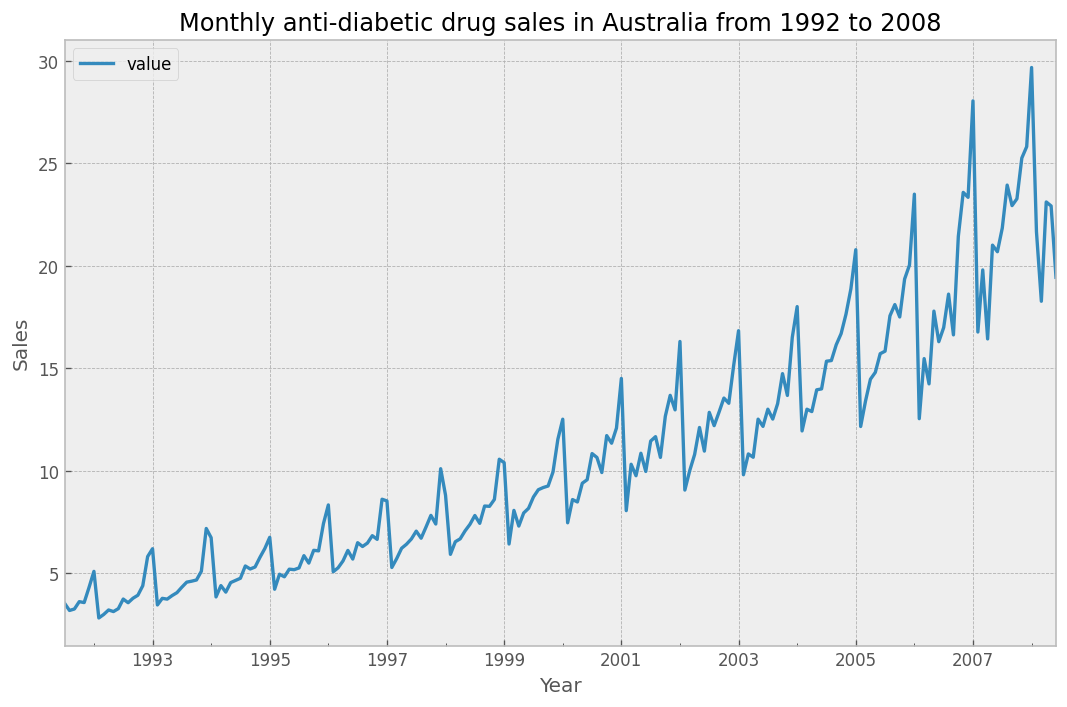

In [86]:
#Visualizing Time Series

df.set_index("date").plot()
plt.title('Monthly anti-diabetic drug sales in Australia from 1992 to 2008')
plt.xlabel('Year')
plt.ylabel('Sales')



In [87]:
#Box plot month wise and year wise distribution
df['year'] = [d.year for d in df.date]
df['month'] = [d.month for d in df.date]
years=df['year'].unique()


In [88]:
df

,date,value,year,month
0,1991-07-01,3.526591,1991,7
1,1991-08-01,3.180891,1991,8
2,1991-09-01,3.252221,1991,9
3,1991-10-01,3.611003,1991,10
4,1991-11-01,3.565869,1991,11
...,...,...,...,...
199,2008-02-01,21.654285,2008,2
200,2008-03-01,18.264945,2008,3
201,2008-04-01,23.107677,2008,4
202,2008-05-01,22.912510,2008,5


In [89]:
years

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008])

These lines of code add two new columns 'year' and 'month' to the DataFrame df, based on the date column. The first line extracts the year for each date in the 'date' column and assigns it to a new column called 'year'. The second line extracts the month for each date in the 'date' column and assigns it to a new column called 'month'.

years=df['year'].unique() creates a new variable years which is a NumPy array containing the unique values of the 'year' column in the DataFrame df. This will be useful if you want to loop over the unique years in the DataFrame to perform some operations or generate plots for each year separately.

<Axes: xlabel='month', ylabel='value'>

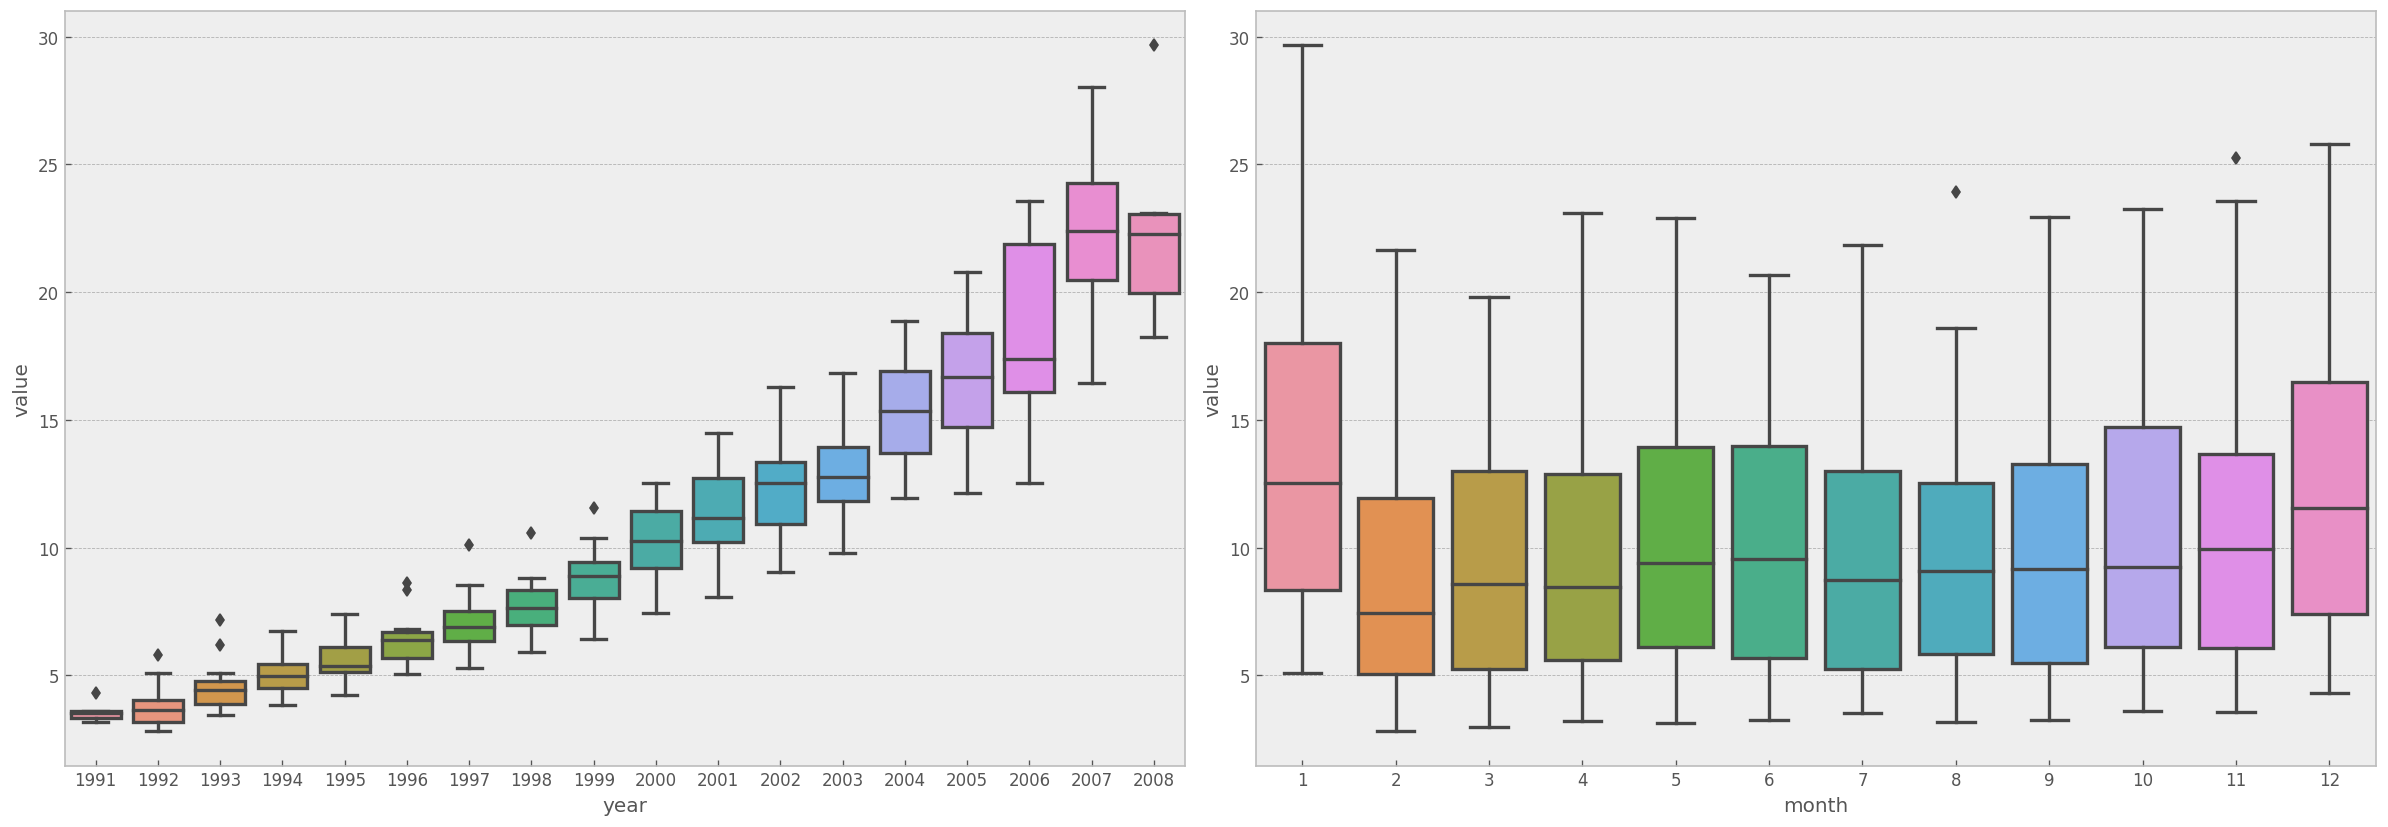

In [90]:
#Subplotting

fig, axes = plt.subplots(1, 2, figsize=(20, 7))
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df, ax=axes[1])

<Axes: xlabel='month', ylabel='value'>

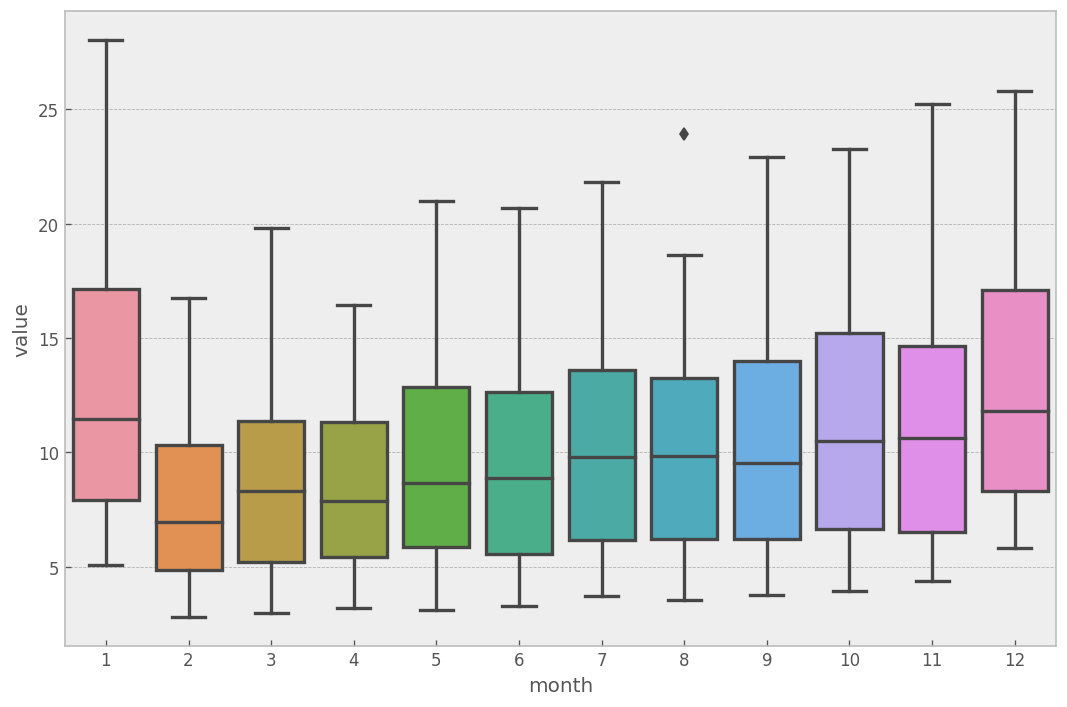

In [91]:
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

<Axes: xlabel='month', ylabel='value'>

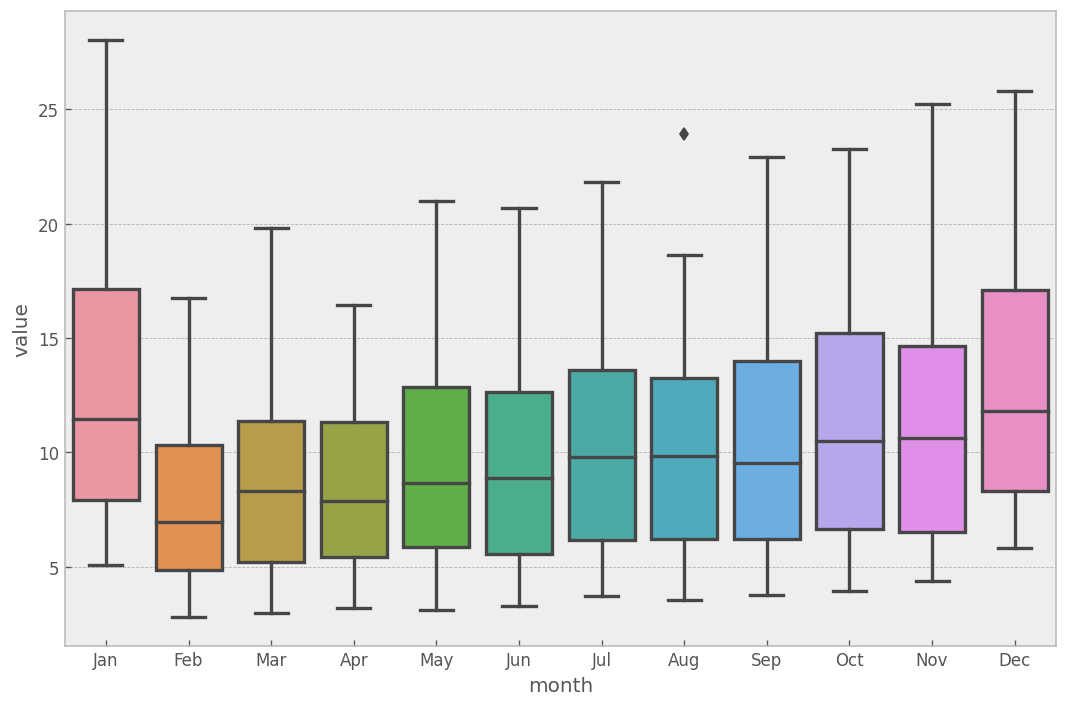

In [92]:
df['month'] = [d.strftime('%b') for d in df.date]
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

df.year.isin([1991, 2008]) creates a Boolean mask that is True for rows where the 'year' column is either 1991 or 2008, and False for all other rows.
~df.year.isin([1991, 2008]) applies the logical NOT operator (~) to the Boolean mask, which flips all True values to False and all False values to True. This creates a new Boolean mask that is True for rows where the 'year' column is not equal to 1991 or 2008, and False for rows where the 'year' column is either 1991 or 2008.
df.loc[~df.year.isin([1991, 2008]), :] uses the Boolean mask to select the rows from the original DataFrame df that satisfy the condition (i.e., where 'year' is not equal to 1991 or 2008), and selects all columns (:) in those rows. The result is a new DataFrame called data that contains only the rows with valid years.

<Axes: xlabel='month', ylabel='value'>

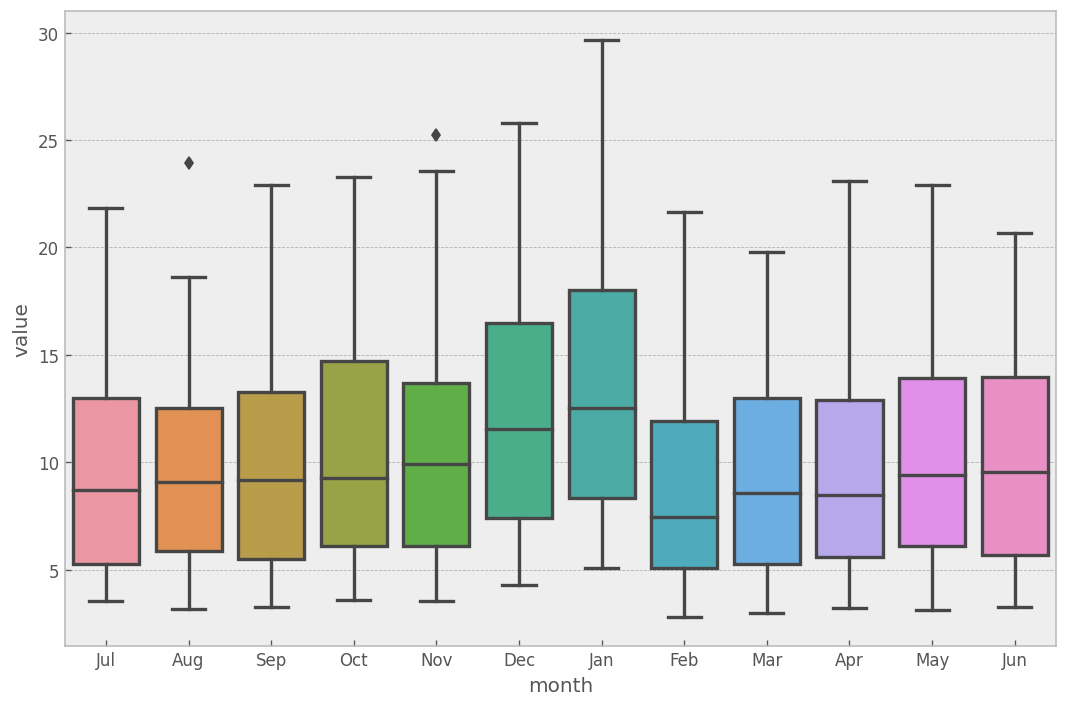

In [93]:
sns.boxplot(x='month', y='value', data=df)

Patterns in a time series:

Time series data can often be decomposed into four main components:

Base Level: The average value of the series over time, which represents the long-term mean or baseline of the data.

Trend: The overall pattern or direction of the series over time, which represents the upward or downward movement of the series over a longer period of time.A trend is observed when there is an increasing or decreasing slope in the time series.

Seasonality: The repetitive and predictable fluctuations in the series that occur at regular intervals, such as daily, weekly, monthly, or yearly patterns.

Error or Residual: The random or irregular fluctuations in the series that cannot be explained by the other components, which represent the unexplained variability or noise in the data.

The decomposition of a time series can help to isolate these components and better understand the underlying patterns and structure in the data. This information can then be used to develop more accurate forecasting models or to identify anomalies or outliers in the data. However, it's not mandatory that all time series must have a trend and/seasonality.

<Axes: title={'center': 'Trend and Seasonality'}, xlabel='date'>

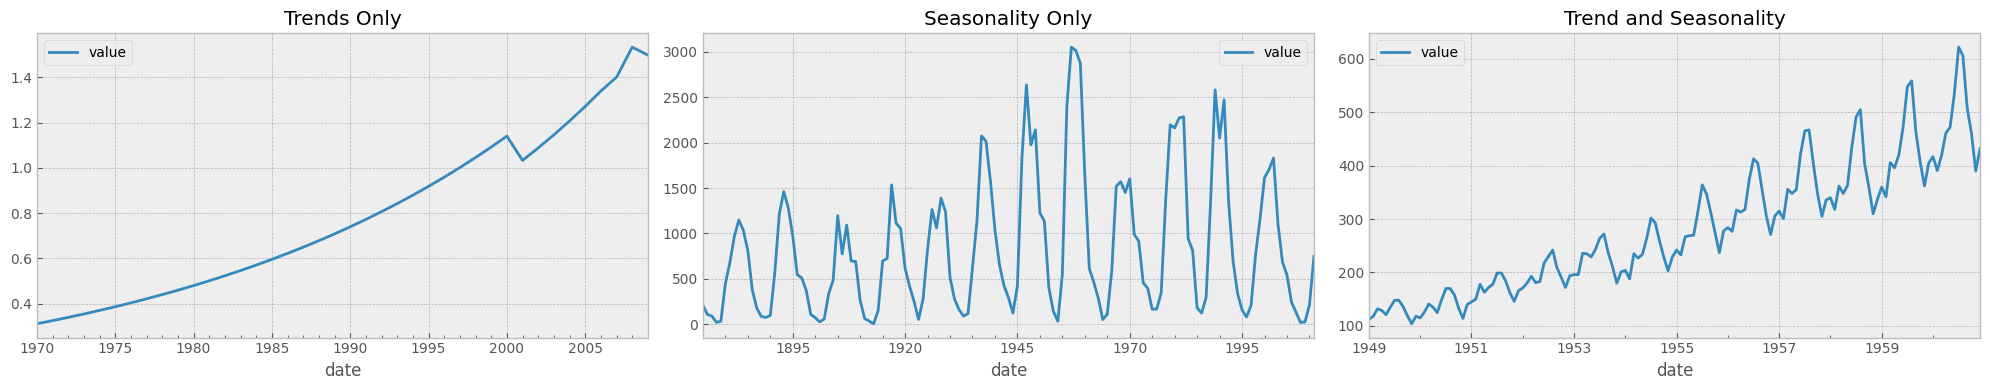

In [94]:
fig, axes = plt.subplots(1, 3, figsize=(20,4), dpi=100)
pd.read_csv("guinearice.csv", parse_dates=["date"], index_col="date").plot(title= "Trends Only", ax=axes[0])
pd.read_csv("sunspotarea.csv", parse_dates=["date"], index_col="date").plot(title= "Seasonality Only", ax=axes[1])
pd.read_csv("AirPassengers.csv", parse_dates=["date"], index_col="date").plot(title= "Trend and Seasonality", ax=axes[2])

Seasonal patterns and cyclic patterns are both periodic patterns that can be observed in time series data, but they have different characteristics.

Seasonal patterns are repetitive patterns that occur at fixed and known intervals of time, such as daily, weekly, monthly, or yearly patterns. These patterns can be caused by natural phenomena (e.g. seasonal weather changes) or by human behavior (e.g. holiday seasons, end-of-quarter sales). Seasonal patterns are typically easy to identify and model, and they can be used to make short-term forecasts or to understand the impact of seasonality on the data.

Cyclic patterns, on the other hand, are also repetitive patterns that occur over time, but they do not have fixed or known intervals like seasonal patterns. Instead, cyclic patterns are more irregular and can occur over longer or shorter periods of time, and they may be caused by a variety of factors such as economic cycles or business cycles. Cyclic patterns are typically harder to identify and model than seasonal patterns, and they may require more sophisticated techniques such as spectral analysis or wavelet analysis.

Identifying cyclic patterns in time series data can be challenging, as cyclic patterns are often more irregular and less predictable than seasonal patterns. However, there are some methods that can be used to identify cyclic patterns:

1. Visual inspection: The first step is to plot the time series data and visually inspect it for any patterns that may repeat over time. Look for cycles that occur at irregular intervals, such as business cycles, economic cycles, or political cycles.

2. Autocorrelation: Autocorrelation is a measure of how correlated a time series is with itself at different lags. Cyclic patterns can often be detected in the autocorrelation plot as periodic spikes that repeat at regular intervals.

3. Spectral analysis: Spectral analysis is a method for decomposing a time series into its frequency components. Cyclic patterns can often be detected in the frequency spectrum as peaks at certain frequencies or harmonics.

4. Wavelet analysis: Wavelet analysis is a method for analyzing the time-frequency characteristics of a time series. It can be used to identify cyclic patterns that occur over a range of frequencies and time scales.

5. Statistical models: Statistical models such as ARIMA or state-space models can be used to identify and model cyclic patterns in time series data. These models can capture the cyclic behavior of the data and provide forecasts for future cycles.

In summary, identifying cyclic patterns in time series data may require a combination of visual inspection, autocorrelation analysis, spectral analysis, wavelet analysis, and statistical modeling. It is important to consider the nature of the data and the potential causes of the cyclic patterns in order to choose the appropriate method for analysis.


Additive and Multiplicate Time Series

Additive and multiplicative time series are two different ways of modeling the relationship between the trend, seasonal, and error components of a time series. The main difference between them is in how the seasonal component is modeled:

Additive Time Series: In an additive time series, the seasonal component is modeled as a fixed pattern that is added to the trend and error components. 

It is linear and changes by the same amount over time. 

Mathematically, an additive time series can be expressed as:

Y(t) = Trend(t) + Seasonal(t) + Error(t)

In this model, the seasonal component is assumed to have a constant magnitude over time, regardless of the level of the trend. This means that the seasonal variation is independent of the level of the time series.

Multiplicative Time Series: In a multiplicative time series, the seasonal component is modeled as a relative pattern that is multiplied by the trend and error components. 

It is non-linear, such as quadratic or exponential, meaning that the change increases or decreases over time. 

Mathematically, a multiplicative time series can be expressed as:

Y(t) = Trend(t) x Seasonal(t) x Error(t)

In this model, the seasonal component is assumed to have a proportional relationship with the trend. This means that the seasonal variation is dependent on the level of the time series, and the magnitude of the seasonal component increases as the level of the trend increases.

In general, additive models are more appropriate when the magnitude of the seasonal variation is constant over time, while multiplicative models are more appropriate when the magnitude of the seasonal variation is proportional to the level of the time series. However, it is important to note that the choice of model depends on the nature of the data and the specific application, and both models may be appropriate for different time series.

In [105]:
#How to decompose a time series into its components and fin out if a time series is additive or multicative
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Import Data
df = pd.read_csv('a10.csv', parse_dates=['date'], index_col='date')

#Additive decomposition
result_add = seasonal_decompose(df["value"], model='additive', extrapolate_trend="freq")

#Multiplicative decomposition
result_mul = seasonal_decompose(df["value"], model='multiplicative', extrapolate_trend="freq")



In [106]:
result_add.trend

date
1991-07-01     3.060085
1991-08-01     3.124765
1991-09-01     3.189445
1991-10-01     3.254125
1991-11-01     3.318805
                ...    
2008-02-01    24.037399
2008-03-01    24.298458
2008-04-01    24.559516
2008-05-01    24.820574
2008-06-01    25.081633
Name: trend, Length: 204, dtype: float64

In [107]:
result_add.seasonal

date
1991-07-01   -0.140765
1991-08-01    0.027747
1991-09-01   -0.090361
1991-10-01    0.602876
1991-11-01    0.970698
                ...   
2008-02-01   -2.232334
2008-03-01   -1.469959
2008-04-01   -1.518226
2008-05-01   -0.624341
2008-06-01   -1.086958
Name: seasonal, Length: 204, dtype: float64

In [108]:
result_add.resid

date
1991-07-01    0.607271
1991-08-01    0.028379
1991-09-01    0.153137
1991-10-01   -0.245998
1991-11-01   -0.723634
                ...   
2008-02-01   -0.150780
2008-03-01   -4.563554
2008-04-01    0.066387
2008-05-01   -1.283723
2008-06-01   -4.562935
Name: resid, Length: 204, dtype: float64

In [109]:
result_add.observed

date
1991-07-01     3.526591
1991-08-01     3.180891
1991-09-01     3.252221
1991-10-01     3.611003
1991-11-01     3.565869
                ...    
2008-02-01    21.654285
2008-03-01    18.264945
2008-04-01    23.107677
2008-05-01    22.912510
2008-06-01    19.431740
Name: value, Length: 204, dtype: float64

The code you provided uses the `seasonal_decompose()` function from the `statsmodels` library to decompose a time series `df["value"]` into its constituent components (trend, seasonality, and residuals) using an additive model. 

The `model` parameter is set to `'additive'` to indicate that the time series is assumed to have an additive structure. The `extrapolate_trend` parameter is set to `'freq'` to indicate that the trend component should be extended to cover the full time range of the input data.

The output of the `seasonal_decompose()` function is stored in the `result_add` variable, which is a `DecomposeResult` object containing the decomposed components of the time series. This object has four attributes: `trend`, `seasonal`, `resid`, and `observed`. 

- `result_add.trend` contains the estimated trend component of the time series. 
- `result_add.seasonal` contains the estimated seasonal component of the time series.
- `result_add.resid` contains the estimated residuals of the time series after removing the trend and seasonal components.
- `result_add.observed` contains the original time series data.

These components can be visualized separately or together to gain insight into the underlying patterns and fluctuations in the time series.

Text(0.5, 0.98, 'Additive Decompose')

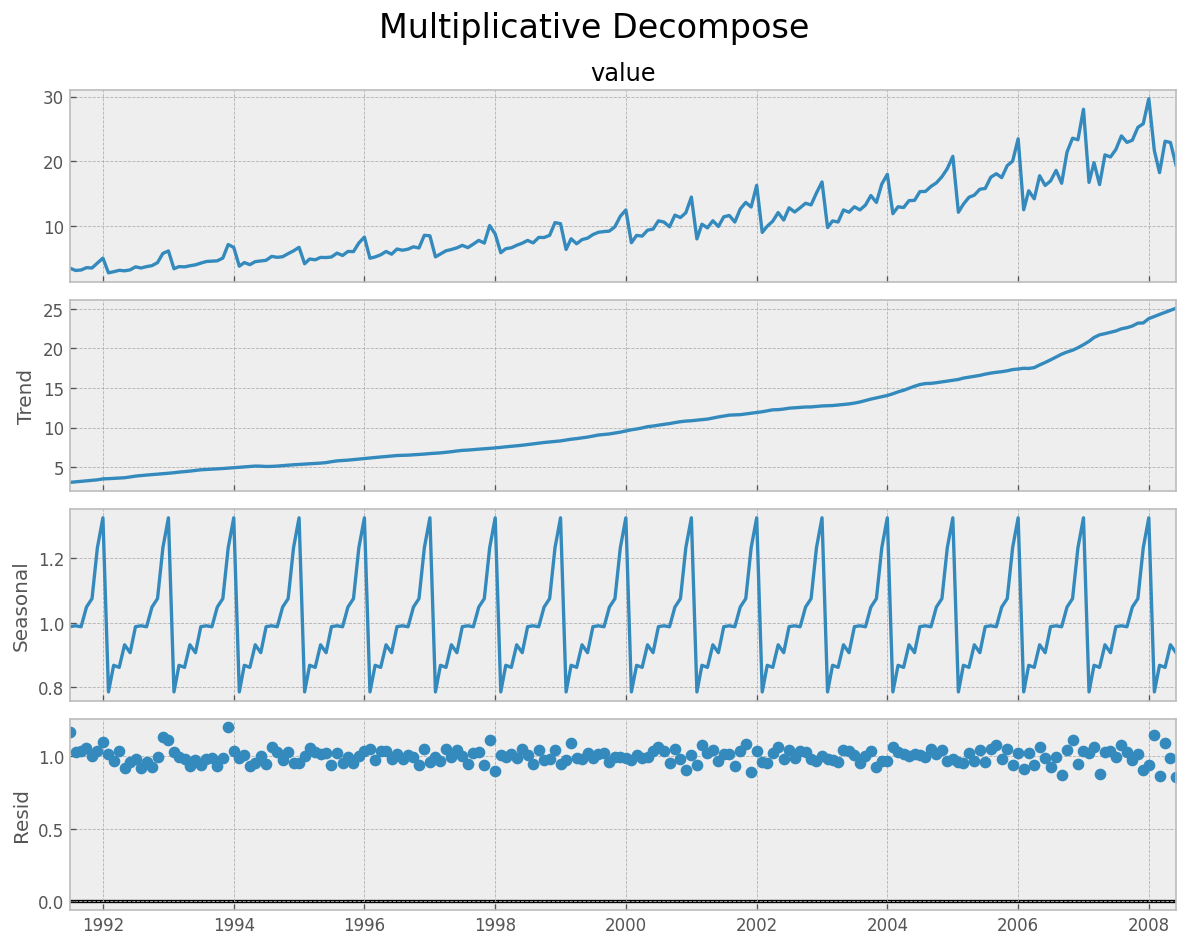

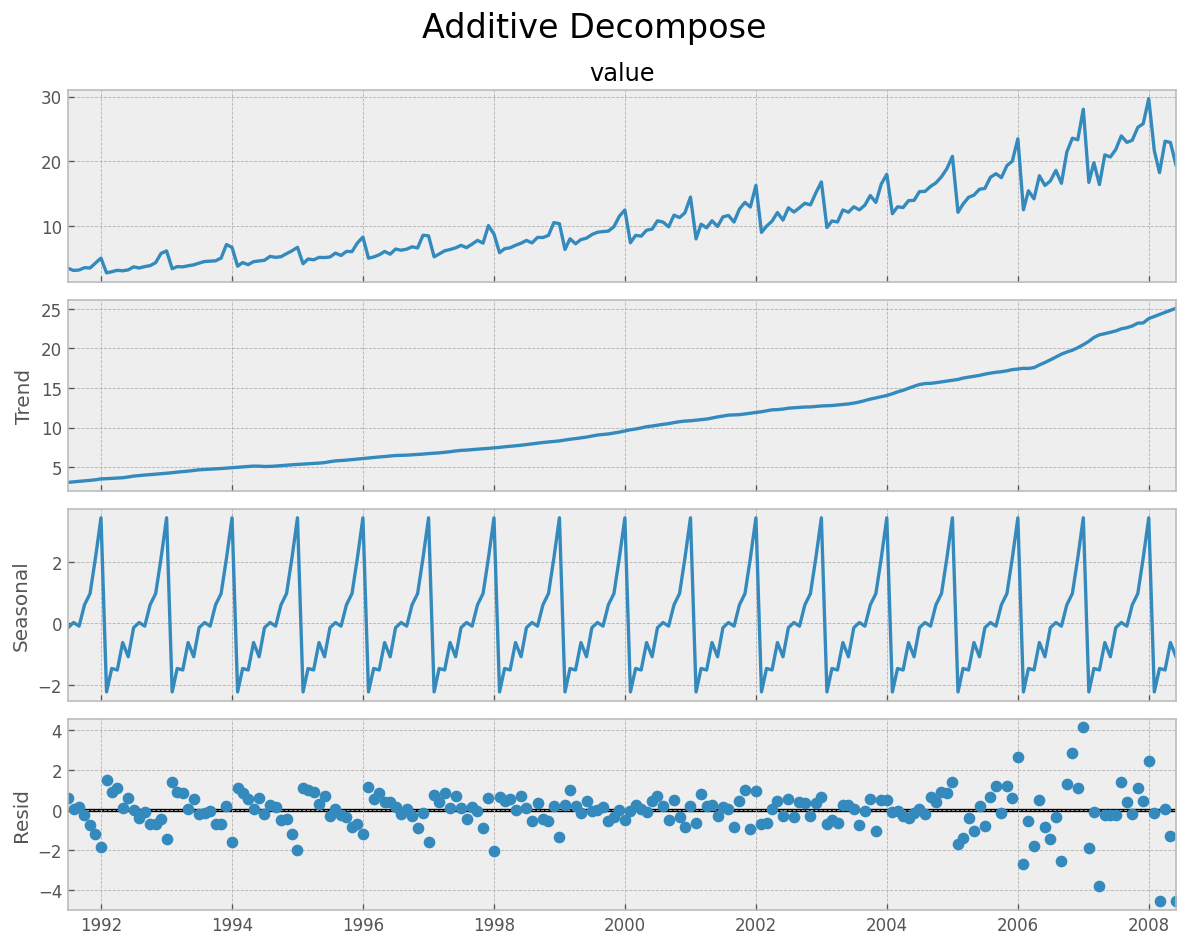

In [113]:
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=20)
result_add.plot().suptitle('Additive Decompose', fontsize=20)